# Logistic Regression on MNIST data.
## We will be using Sci-kit learn library to implement Logistic Regression.

For more information on Logistic Regression, visit https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

MNIST data was taken from https://www.openml.org/d/554

## We will start by importing various libraries.

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing MNIST data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
type(mnist), type(mnist.data), type(mnist.feature_names), type(mnist.target)

(sklearn.utils.Bunch,
 pandas.core.frame.DataFrame,
 list,
 pandas.core.series.Series)

#### We will convert data to a numpy array.

In [4]:
mnist.data = mnist.data.to_numpy()
print(type(mnist.data))

<class 'numpy.ndarray'>


In [5]:
mnist.target = mnist.target.to_numpy()
print(type(mnist.target))

<class 'numpy.ndarray'>


## Splitting data in train and test set.

In [6]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1.0/7.0, random_state=0)

## Visualization

### Visualizing images

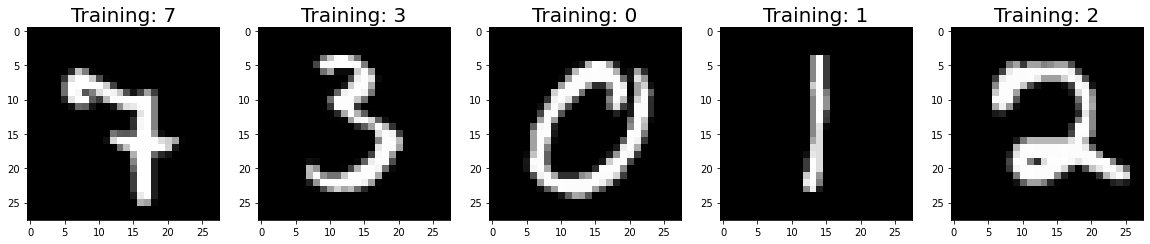

In [7]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: ' + label, fontsize = 20)

### Frequency

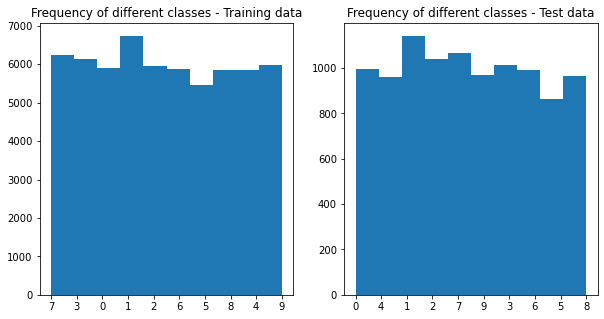

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(train_lbl);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(test_lbl);
plt.title('Frequency of different classes - Test data');

## Importing and instantiating model.

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logisticRegr = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        n_jobs=2,
                        C=50, verbose=2, tol=0.01)

## Training model

In [11]:
logisticRegr.fit(train_img, train_lbl)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 48 epochs took 203 seconds


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  3.4min finished


LogisticRegression(C=50, max_iter=1000, n_jobs=2, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

## Validation

In [12]:
predictions = logisticRegr.predict(test_img)

In [13]:
score_test = logisticRegr.score(test_img, test_lbl)
print(score_test)

0.9196


### We have an accuaracy of 91% in test set.

In [14]:
score_train = logisticRegr.score(train_img, train_lbl)
print(score_train)

0.9375666666666667


### We have an accuaracy of 93% in train set.


## Visualizing actual vs predicted output.

In [15]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1

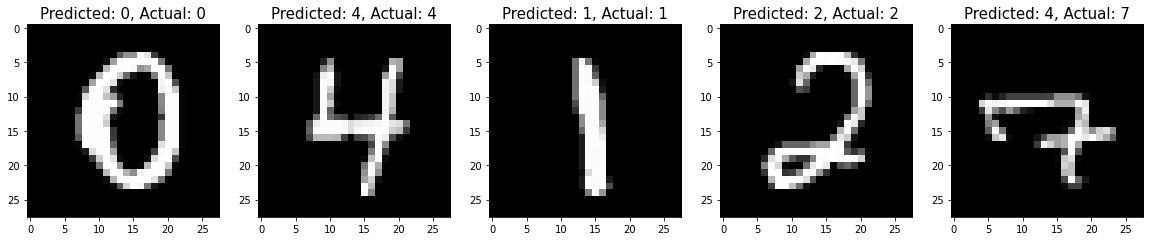

In [16]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

## Confusion matrix

In [17]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_true=test_lbl, 
                         y_pred = predictions, 
                        labels = logisticRegr.classes_)

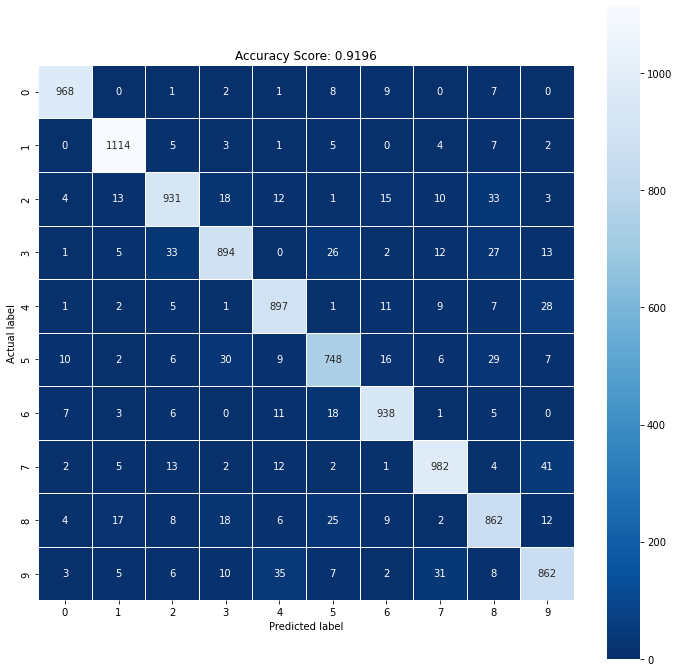

In [20]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title);

## Thank you